##ENSEMBLE
Ensemble models combine several models to improve the overall performance. Usually, the weak learners were combined to boost performance. However, the recent results show that combining several strong approaches can also result in a better performance.

<img src = "https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/creative-assets/s-migr/ul/g/4b/c9/ensemble-learning-bagging.png" width="900">

In regression, ensemble models such as Random Forest and Voting Regressor combine multiple base regressors and average their predictions. This reduces variance and makes the final model more stable and robust compared to any individual model.

Here, we will build an ensemble regressor using several base models and compare its performance with each individual model.

##Data Description

We use the California Housing dataset from sklearn.datasets, which contains information about housing in districts of California.

Target:

**MedHouseVal:** Median house value (in units of 100,000 USD)

##Task

In this project, we want to predict the median house value of a district based on its demographic and geographic features.

We will use three different algorithms:

- LinearRegression

- RandomForestRegressor

- DecisionTreeRegressor

Then we will combine them using a VotingRegressor (ensemble).

**We will:**

- Perform a quick data analysis

- Train individual regression models

- Build and evaluate a VotingRegressor ensemble

- Compare their RMSE and R² scores

##Conclusion (Regression)

We used three different models to predict median house values:

- LinearRegression

- RandomForestRegressor

- DecisionTreeRegressor

VotingRegressor (ensemble of all three)

You should see something like:

**LinearRegression:** moderate RMSE, decent R²

**DecisionTreeRegressor:** very low train error, worse test error (overfitting)

**RandomForestRegressor:** better generalization, good R²

**VotingRegressor:** performance often comparable to or slightly better than the best single model

The VotingRegressor combines different types of models and can give a more robust performance across different regions of the data.

##Imports
Import core libraries NumPy and pandas for numerical operations and tabular data handling.

Import matplotlib.pyplot and seaborn for creating visualizations and exploratory data analysis plots.

Load the California Housing dataset using fetch_california_housing from sklearn.datasets.

Use train_test_split to divide the dataset into training and testing sets.

Import evaluation metrics RMSE (via mean_squared_error) and R² (via r2_score) to assess model performance.

Bring in three regression models:

LinearRegression as a simple, interpretable baseline model.

RandomForestRegressor as an ensemble tree-based model for capturing nonlinear patterns.

DecisionTreeRegressor as a single-tree model for flexible but high-variance fitting.

Import VotingRegressor to build an ensemble that combines predictions from multiple regressors for more robust performance.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor


##Load data
Loading the California Housing Dataset

The California Housing dataset is loaded using fetch_california_housing(as_frame=True), which returns the data as a pandas DataFrame.

The resulting data_reg DataFrame contains all predictor features (such as median income, average rooms, population, and latitude/longitude) along with the target variable MedHouseVal, representing median house value in each district.

Displaying the first few rows using data_reg.head() provides an initial view of the dataset structure, feature names, and typical value ranges—helpful for understanding the data before preprocessing and modeling.

In [ ]:
california = fetch_california_housing(as_frame=True)
data_reg = california.frame

data_reg.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


##Data Analysis

- A histogram is plotted for each feature in the California Housing dataset to examine the distribution of values across all variables.

- Histograms help identify skewness, outliers, and the general shape of each feature’s distribution, which informs preprocessing decisions such as scaling or transformation.

- Using figsize=(10, 8) and tight_layout() ensures that all subplots are clearly visible and neatly arranged.

- This step provides an essential first look at the variability and behavior of the dataset before building regression models.

Histogram of a key feature

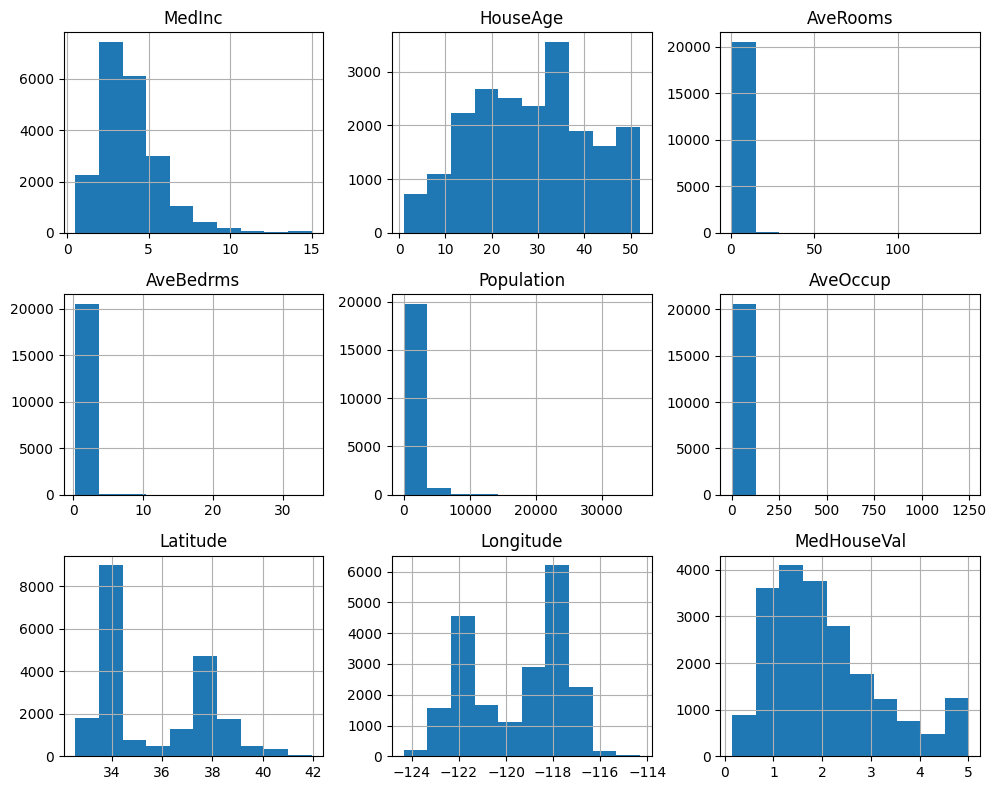

In [ ]:
data_reg.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()



##Correlation heatmap (optional subset)
- A correlation heatmap is generated to visualize relationships between numerical features and the target variable in the California Housing dataset.

- Using sns.heatmap, the plot reveals how strongly each feature correlates with others, helping identify multicollinearity and key predictors of median house value.

- The 'YlGnBu' colormap provides a clear gradient, making positive and negative correlations easy to interpret.

- This visualization guides model selection and feature engineering by highlighting which variables contribute most to predicting housing prices.

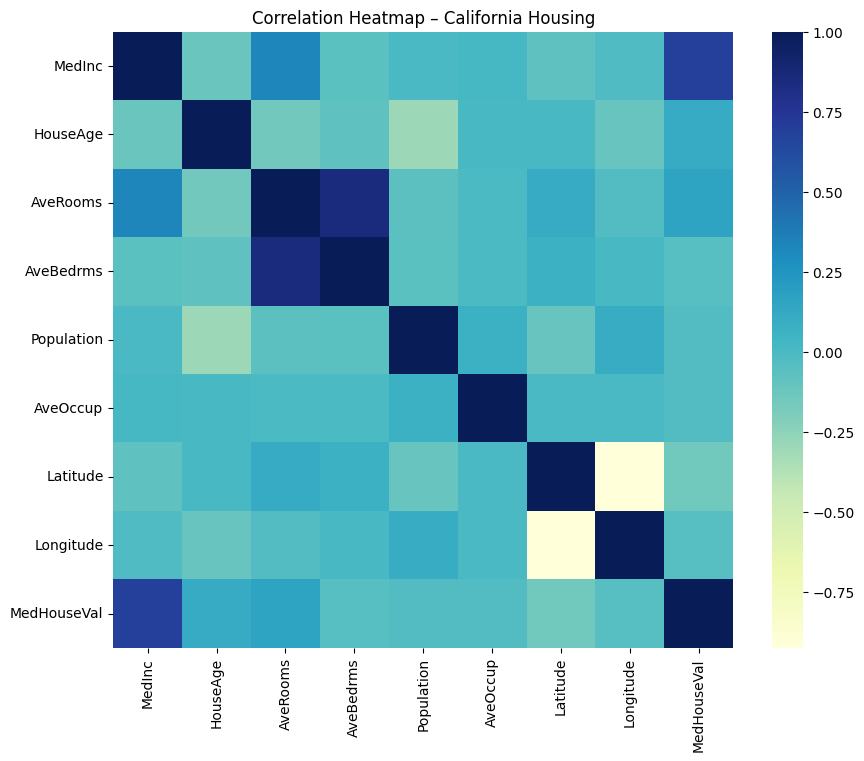

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_reg.corr(), annot=False, cmap='YlGnBu')
plt.title("Correlation Heatmap – California Housing")
plt.show()



##Feature / Target Split
- The dataset is split into features (X) and the target variable (y).

- All columns except MedHouseVal are stored in X, representing the predictors used for modeling.

- The target column MedHouseVal, which contains the median house value for each district, is stored in y.

- Printing the shapes confirms the number of samples and features, ensuring the data is correctly prepared for training and evaluation.

In [ ]:
X = data_reg.drop(columns=["MedHouseVal"])
y = data_reg["MedHouseVal"]

print(X.shape, y.shape)


(20640, 8) (20640,)


##Train–Test Split
- The dataset is divided into training and testing sets using an 70/30 split.

- X_train and y_train are used to fit the regression models, while X_test and y_test evaluate model performance on unseen data.

- A fixed random_state=42 ensures the split is reproducible, allowing consistent model comparison across runs.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


##Train Base Models
- The dataset is divided into training and testing sets using an 70/30 split.

- X_train and y_train are used to fit the regression models, while X_test and y_test evaluate model performance on unseen data.

- A fixed random_state=42 ensures the split is reproducible, allowing consistent model comparison across runs.

In [ ]:
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
dt_reg = DecisionTreeRegressor(random_state=42)

lin_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

##Evaluation Helper
- This function evaluates any regression model by comparing its predictions on both the training and testing sets.

- For each model, it computes:

a. RMSE (Root Mean Squared Error) to measure average prediction error

b. R² score to indicate how much variance the model explains

The function prints both training and testing metrics, making it easy to compare model performance and detect issues like overfitting or underfitting.

The separator line improves readability when evaluating multiple models sequentially.

In [ ]:
def eval_regressor(name, model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print(f"{name}")
    print(f" Train  - RMSE: {rmse_train:.3f}, R²: {r2_train:.3f}")
    print(f" Test   - RMSE: {rmse_test:.3f}, R²: {r2_test:.3f}")
    print("-" * 40)


## Evaluate base models
- The evaluation function is applied to three different models to compare their performance on the California Housing dataset:

- Linear Regression – a simple, interpretable baseline model

a. Random Forest Regressor – an ensemble of decision trees designed to capture complex nonlinear patterns

b. Decision Tree Regressor – a single tree model that can fit the data very closely but often overfits

- For each model, both training and testing RMSE and R² scores are reported.

- This comparison helps identify how well each model generalizes, how complex it is, and whether it is overfitting or underfitting.

- The printed results offer an immediate understanding of which models perform best and which may need tuning or regularization.

In [ ]:
eval_regressor("LinearRegression", lin_reg, X_train, y_train, X_test, y_test)
eval_regressor("RandomForestRegressor", rf_reg, X_train, y_train, X_test, y_test)
eval_regressor("DecisionTreeRegressor", dt_reg, X_train, y_train, X_test, y_test)


LinearRegression
 Train  - RMSE: 0.723, R²: 0.609
 Test   - RMSE: 0.728, R²: 0.596
----------------------------------------
RandomForestRegressor
 Train  - RMSE: 0.192, R²: 0.972
 Test   - RMSE: 0.506, R²: 0.805
----------------------------------------
DecisionTreeRegressor
 Train  - RMSE: 0.000, R²: 1.000
 Test   - RMSE: 0.727, R²: 0.598
----------------------------------------


## Ensemble – Voting Regressor

- A VotingRegressor is created by combining three models: Linear Regression, Random Forest Regressor, and Decision Tree Regressor.

- This ensemble aggregates predictions from all base models, often leading to more stable and well-generalizing results.

- The model is trained on the training data using voting_reg.fit().

- The evaluation function is then used to compare its performance against individual models.

- This approach helps determine whether combining multiple algorithms yields improved accuracy and reduced variance compared to standalone regressors.

In [ ]:
voting_reg = VotingRegressor(
    estimators=[
        ('lr', lin_reg),
        ('rf', rf_reg),
        ('dt', dt_reg)
    ]
)

voting_reg.fit(X_train, y_train)
eval_regressor("VotingRegressor", voting_reg, X_train, y_train, X_test, y_test)


VotingRegressor
 Train  - RMSE: 0.290, R²: 0.937
 Test   - RMSE: 0.559, R²: 0.762
----------------------------------------


## Residual Plot for Ensemble

- The residuals are calculated as the difference between actual and predicted median house values.

- A scatter plot of residuals vs. predicted values is generated to examine the model’s error patterns.

- Points scattered randomly around the horizontal zero line indicate that the Voting Regressor makes unbiased predictions with no strong systematic error.

- The dashed line at zero serves as a reference to highlight under- and over-predictions.

- This plot helps confirm the ensemble model’s stability and generalization, showing whether errors increase in certain value ranges or remain consistent across predictions.

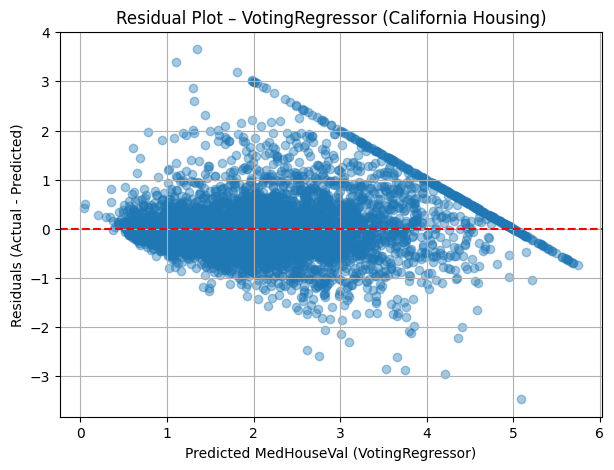

In [ ]:
y_pred_voting = voting_reg.predict(X_test)
residuals = y_test - y_pred_voting

plt.figure(figsize=(7, 5))
plt.scatter(y_pred_voting, residuals, alpha=0.4)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted MedHouseVal (VotingRegressor)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot – VotingRegressor (California Housing)")
plt.grid(True)
plt.show()


##Model Comparison – Linear, Random Forest, Decision Tree, and Voting Regressor

Linear Regression shows moderate performance with similar RMSE and R² on both training and test sets, indicating a stable but limited ability to capture nonlinear patterns in the data.

Random Forest Regressor performs extremely well on the training set (very low RMSE, very high R²), suggesting strong fitting capacity, but the higher error on the test set shows some degree of overfitting—still, it generalizes far better than linear or decision tree models.

Decision Tree Regressor reaches perfect performance on the training set (RMSE = 0, R² = 1.0), clearly overfitting the data. Its test performance is nearly identical to Linear Regression, confirming weak generalization.

Voting Regressor, which blends Linear Regression, Random Forest, and Decision Tree predictions, achieves a strong balance:

Train R² = 0.937 (high, but not overfitted)

Test R² = 0.762 (strong performance, only slightly below Random Forest)

The residual plot for the Voting Regressor shows errors scattered around zero, with no strong pattern, indicating stable and unbiased predictions.


##Final Conclusion

Among all individual models, Random Forest provides the best test performance, but with signs of mild overfitting.

Decision Tree severely overfits and underperforms on unseen data.

Linear Regression generalizes consistently but lacks predictive strength due to model simplicity.

The Voting Regressor delivers the best trade-off between bias and variance, combining strengths from all three base models.

Its residual distribution confirms improved stability and reduced systematic error.

Overall, the Voting Regressor emerges as a robust and well-balanced model, offering strong predictive accuracy without extreme overfitting—making it a reliable choice for this regression task.